In [45]:
!pip install easyocr
!pip install imutils

In [47]:
from matplotlib import pyplot as plt
from google.colab import files
import numpy as np
import imutils
import easyocr
import cv2
from PIL import Image, ImageFilter

In [48]:
uploaded = files.upload()

Saving car.jpg to car (1).jpg


In [49]:
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)

In [50]:
image_bgr = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)


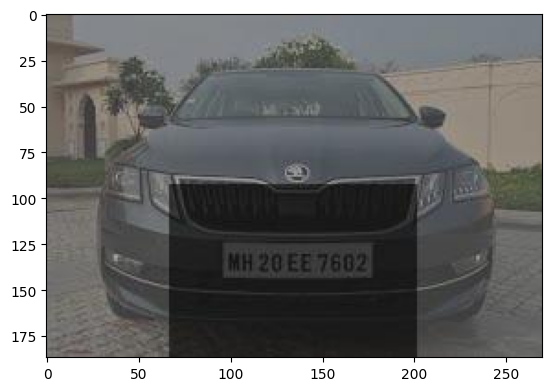

In [51]:
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))


In [52]:
grayscaled = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

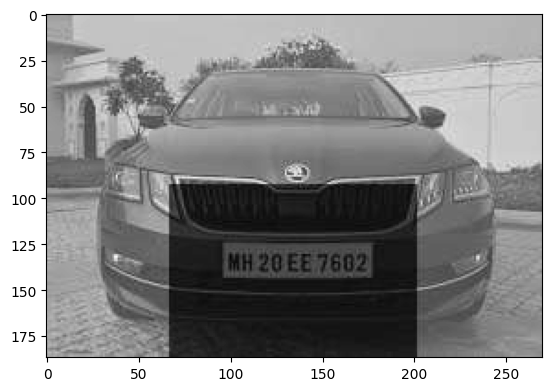

In [53]:
plt.imshow(grayscaled, cmap='gray')

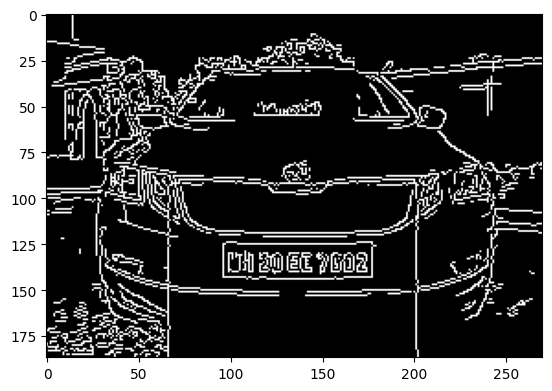

In [54]:
edge_of_image = cv2.Canny(grayscaled, 90, 60)
plt.imshow(edge_of_image, cmap='gray')

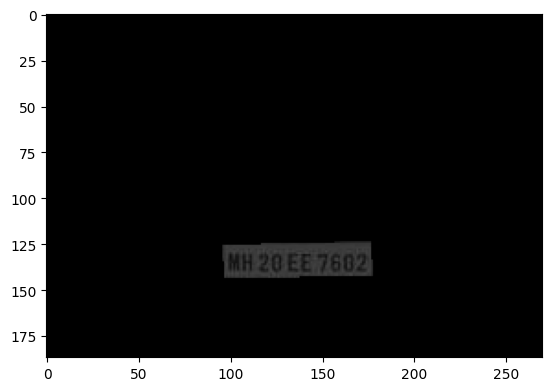

In [55]:
LH = cv2.findContours(edge_of_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
lines = imutils.grab_contours(LH)
lines2 = sorted(lines, key=cv2.contourArea, reverse=True)[:3]

for i in lines2:
    estimated = cv2.approxPolyDP(i, 5, True)
    if len(estimated) == 4:
        points = estimated
        break

black_image = np.zeros(grayscaled.shape, np.uint8)

pelak = cv2.drawContours(black_image, [points], 0, 255, -1)

pelak = cv2.bitwise_and(image_bgr, image_bgr, mask=black_image)

plt.imshow(cv2.cvtColor(pelak, cv2.COLOR_BGR2RGB))

In [56]:
(x, y) = np.where(black_image == 255)

x_top_left = np.min(x)
y_top_left = np.min(y)
x_down_right = np.max(x)
y_down_right = np.max(y)

trim = pelak[x_top_left:x_down_right, y_top_left:y_down_right]

In [57]:
brightness_factor = 1.5
brightened_image = np.clip(trim * brightness_factor, 0, 255).astype(np.uint8)

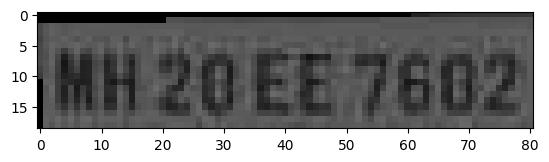

In [58]:
plt.imshow(cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB))
plt.show()

OCR Results: [([[1, 5], [81, 5], [81, 19], [1, 19]], 'MH 20 EE 7602', 0.5323001638301985)]


Detected Text: MH 20 EE 7602




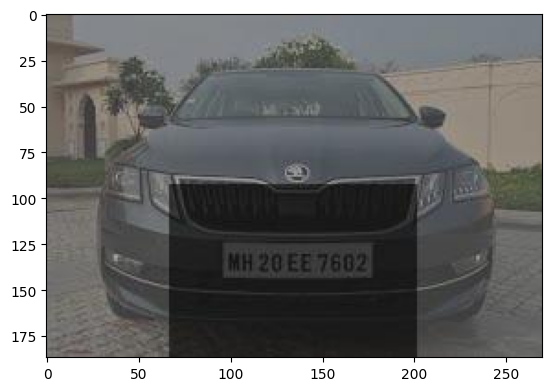

In [60]:
reader = easyocr.Reader(['en'])
result = reader.readtext(brightened_image)

print("OCR Results:", result)
print('\n')

if result:
    print("Detected Text:", result[0][-2])
    print('\n')

plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
